In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import graphviz


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier



In [2]:
# Lendo o dataset
df = pd.read_excel('/home/emersds/repos_projetos/default_credit_card/dataset/dados_limpos.xlsx')

In [3]:
features_response = df.columns.tolist()

In [4]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school','high school', 'others', 'university']

In [5]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values, df['default payment next month'].values, test_size=0.2, random_state=24
)

In [7]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [8]:
# visualizando a decision tree em graphvis
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, feature_names=features_response[:-1], proportion=True, class_names=['Not defaulted', 'Defaulted'])

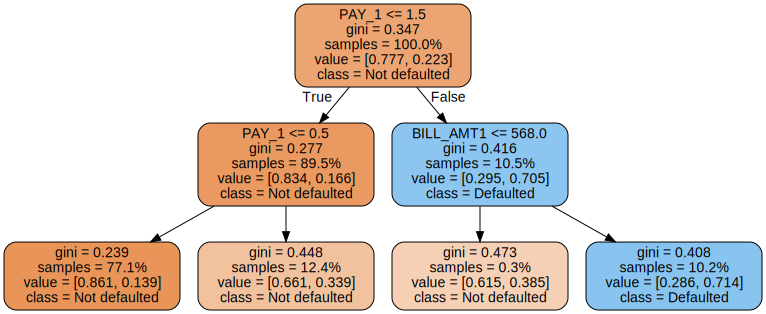

In [9]:
graph = graphviz.Source(dot_data)
graph

In [10]:
# confirmando os valores da arvore
features_response[:-1].index('PAY_1')

4

In [11]:
X_train.shape

(21331, 17)

In [12]:
# confirmando a proporção de amostras após a primeira divisão da árvore de decisão
sum(X_train[:,4] <= 1.5)/X_train.shape[0]

np.float64(0.8946134733486475)

In [13]:
# confirmando a proporção de amostras da classe positiva
np.mean(y_train)

np.float64(0.223102526838873)

In [14]:
# utilizando a busca em grade para encontrar os melhores hiper parâmetros
params = {
    'max_depth': range(1,11),
    'min_samples_split': range(2, 20, 2),
    'min_samples_leaf': range(1, 20, 2)
}

In [15]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc', n_jobs=None, refit=True, cv=4, verbose=1, error_score=np.nan, return_train_score=True )

In [16]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 900 candidates, totalling 3600 fits


KeyboardInterrupt: 

In [17]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.030651,0.006004,0.003313,0.001262,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.639514,0.643398,...,0.650753,0.646389,0.005136,811,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.026911,0.001828,0.003055,0.000988,1,1,4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.639514,0.643398,...,0.650753,0.646389,0.005136,811,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
2,0.028745,0.002710,0.002880,0.000535,1,1,6,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.639514,0.643398,...,0.650753,0.646389,0.005136,811,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
3,0.028051,0.002653,0.002492,0.000127,1,1,8,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.639514,0.643398,...,0.650753,0.646389,0.005136,811,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
4,0.032246,0.002975,0.004502,0.001346,1,1,10,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.639514,0.643398,...,0.650753,0.646389,0.005136,811,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.258708,0.029311,0.004088,0.001791,10,19,10,"{'max_depth': 10, 'min_samples_leaf': 19, 'min...",0.733283,0.711365,...,0.734819,0.728903,0.010176,541,0.836562,0.840661,0.835449,0.824739,0.834353,0.005880
896,0.232798,0.005027,0.003147,0.000062,10,19,12,"{'max_depth': 10, 'min_samples_leaf': 19, 'min...",0.732719,0.710776,...,0.735459,0.728253,0.010137,621,0.836562,0.840678,0.835484,0.824739,0.834366,0.005886
897,0.230663,0.002247,0.003350,0.000143,10,19,14,"{'max_depth': 10, 'min_samples_leaf': 19, 'min...",0.731675,0.711057,...,0.733622,0.727666,0.009638,625,0.836562,0.840661,0.835484,0.824724,0.834358,0.005888
898,0.230798,0.005777,0.003689,0.000547,10,19,16,"{'max_depth': 10, 'min_samples_leaf': 19, 'min...",0.732750,0.711729,...,0.733417,0.727859,0.009318,623,0.836562,0.840661,0.835484,0.824724,0.834358,0.005888


In [18]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

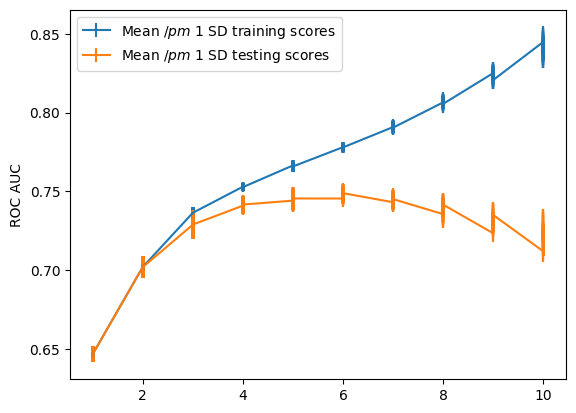

In [19]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_train_score'], yerr=cv_results_df['std_train_score'], label='Mean $/pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'], yerr=cv_results_df['std_test_score'], label='Mean $/pm$ 1 SD testing scores') 
plt.ylabel('ROC AUC')
plt.legend()

1. As árvores menos profundas tem mais viés, já que não ajustam tão vem aos dados de treinamento. Se aceitarmos algum viés, teremos melhor desempenho nos dados de teste, que é a métrica definitiva usada na seleção de hiper paramêtros de modelos. 

In [20]:
# ajustando uma floresta aleatória

rf = RandomForestClassifier (
    n_estimators=10,
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    random_state=4,
    n_jobs=None,
    verbose=0,
    class_weight=None,
    warm_start=False,
    max_features=None,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False
)

In [21]:
rf_params_ex = {'n_estimators': list(range(10,110,10))}

In [22]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc', n_jobs=None, refit=True, cv=4, verbose=1, error_score=np.nan, return_train_score=True )

In [23]:
# ajustando o modelo com objeto da validação cruzada
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, max_features=None,
                                              n_estimators=10, random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [24]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

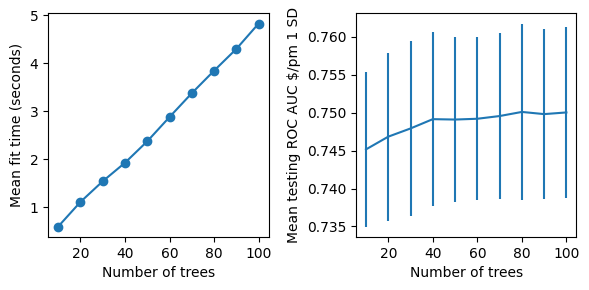

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'], cv_rf_ex_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'], cv_rf_ex_results_df['mean_test_score'], yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $/pm 1 SD')
plt.tight_layout()

In [26]:
cv_rf_ex.best_params_

{'n_estimators': 80}

In [27]:
# criando um dicionário com os nomes e a importância das características pelo best_estimator
feat_imp_df = pd.DataFrame({'Feature name': features_response[:-1], 'Importance': cv_rf_ex.best_estimator_.feature_importances_})
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.922068
12,PAY_AMT2,0.028114
5,BILL_AMT1,0.018599
0,LIMIT_BAL,0.011329
13,PAY_AMT3,0.003432
16,PAY_AMT6,0.003154
15,PAY_AMT5,0.002486
1,EDUCATION,0.001836
14,PAY_AMT4,0.001760
11,PAY_AMT1,0.001490


1. FEATURE_IMPORTANCES_ é um método que pode ser usado em modelos de floresta aleatória ajustados. 
2. As 5 primeiras características são as mesma do teste F, só mudando a ordem. 

Text(0, 0.5, 'Y coordinate')

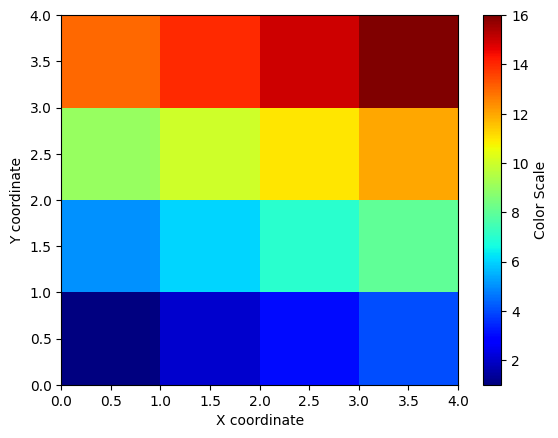

In [28]:
xx_example, yy_example = np.meshgrid(range(5), range(5))
z_example = np.arange(1,17).reshape(4,4)
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color Scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

# Criando RF para o estudo de caso

In [29]:
rf_params = {'max_depth':[3,6,9,12], 
             'n_estimators':[200, 300, 500, 1000],
             'max_features': ['sqrt', 'log2', None],
            }

In [30]:
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc', n_jobs=None, refit=True, cv=4, verbose=2, error_score=np.nan, return_train_score=True )

In [31]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=200; total time=   3.2s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=200; total time=   2.8s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=200; total time=   2.9s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=300; total time=   4.5s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=300; total time=   4.1s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=300; total time=   4.1s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=300; total time=   4.0s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=500; total time=   7.4s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=500; total time=   6.8s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=500; total time=   6.8s
[CV] END ...max_depth=3, max_features=sqrt, n_e

/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, max_features=None,
                                              n_estimators=10, random_state=4),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [200, 300, 500, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [32]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

In [41]:
cv_rf_results_df.shape

(48, 21)

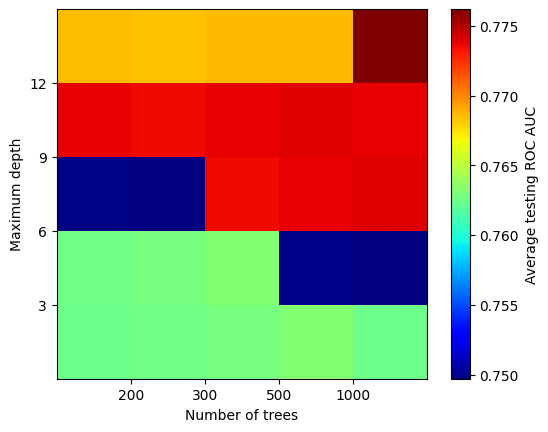

In [42]:
# Definindo xx_rf e yy_rf como um grid de (5,5)
xx_rf, yy_rf = np.meshgrid(range(5), range(5))

# Usando um colormap
cm_rf = plt.cm.jet

# Criando o gráfico
ax_rf = plt.axes()

# Redimensionando cv_rf_results_df['mean_test_score'] para (5,5)
# Certifique-se de que os dados têm pelo menos 25 elementos
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values[:25].reshape((5,5)), cmap=cm_rf)

# Adicionando a barra de cores
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')

# Ajustando o aspecto
ax_rf.set_aspect('equal')

# Definindo ticks e labels
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])

# Definindo rótulos dos eixos
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

# Exibindo o gráfico
plt.show()


1. Das combinações de parametros que testamos, max_depth=9 com 200 árvores produz a melhor pontuação média de teste (ROC AUC 0.776). Melhor modelo até agora.
2. Em um cenário do mundo rela, faríamos uma busca mais completa partindo de >200 árvores.
3. Não abordamos o desbalanceamento de classes na variável resposta ('class_weight='balanced'). Se tentar fazer isso verá que o feito não mudará muito o desempenho do modelo, já que neste caso, o desbalanceamento de classes nos dados não é particularmente severo.